# Importando bibliotecas

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sys
sys.path.insert(1, '../predict_stock_mvp/pre_train/')
import load_data
from datetime import date, datetime
from dateutil.relativedelta import relativedelta

# Criando cálculo de previsão de média móvel

In [2]:
data = load_data.conect_data.load_table('../../data/data_ingestion/', 'ingestion.itens_output_mvp', 'csv', sep=None)

../predict_stock_mvp/pre_train\load_data.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(f'{location_table}/{name_table}.{type_table}', encoding=encoding, sep=sep)


In [4]:
data_predict_media_movel = data[["NUMERO_REGISTRO_PRODUTO","DATA_DE_CONSUMO","QUANTIDADE_SAIDA"]]

In [5]:
predict_media = []
for item in data_predict_media_movel["NUMERO_REGISTRO_PRODUTO"].unique():
    serie_itens = data_predict_media_movel.query(f"NUMERO_REGISTRO_PRODUTO == {item}")
    media_movel = list(serie_itens.QUANTIDADE_SAIDA.shift(1).rolling(3).mean())
    for n in media_movel[:]:
        predict_media.append(n)
        
data_predict_media_movel["PREDICAO"] = predict_media

C:\Users\anton\AppData\Local\Temp\ipykernel_3628\3613286706.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_predict_media_movel["PREDICAO"] = predict_media


In [9]:
data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 10277002")

,NUMERO_REGISTRO_PRODUTO,DATA_DE_CONSUMO,QUANTIDADE_SAIDA,PREDICAO
0,10277002,2020-02-29,21,NaN
1,10277002,2020-03-31,18,NaN
2,10277002,2020-04-30,56,NaN
3,10277002,2020-05-31,0,31.666667
4,10277002,2020-06-30,21,24.666667
5,10277002,2020-07-31,8,25.666667
6,10277002,2020-08-31,30,9.666667
7,10277002,2020-09-30,17,19.666667
8,10277002,2020-10-31,16,18.333333
9,10277002,2020-11-30,5,21.000000


In [10]:
mean_absolute_error(data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 10277002")["QUANTIDADE_SAIDA"], data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 10277002")["PREDICAO"].replace(np.nan, 0))

16.76388888888889

In [13]:
mean_absolute_error(data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020070")["QUANTIDADE_SAIDA"], data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020070")["PREDICAO"].replace(np.nan, 0))

19.125

In [67]:
mean_absolute_error(data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020082")["QUANTIDADE_SAIDA"], data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020082")["PREDICAO"].replace(np.nan, 0))

11.847222222222223

In [68]:
mean_absolute_error(data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020086")["QUANTIDADE_SAIDA"], data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020086")["PREDICAO"].replace(np.nan, 0))

10.222222222222223

In [69]:
mean_absolute_error(data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020095")["QUANTIDADE_SAIDA"], data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020095")["PREDICAO"].replace(np.nan, 0))

12.805555555555555

In [66]:
mean_absolute_error(data_predict_media_movel["QUANTIDADE_SAIDA"], data_predict_media_movel["PREDICAO"].replace(np.nan, 0))

15.082027777777778

In [78]:
mean_squared_error(data_predict_media_movel["QUANTIDADE_SAIDA"], data_predict_media_movel["PREDICAO"].replace(np.nan, 0))

374.2888009259259

<AxesSubplot:>

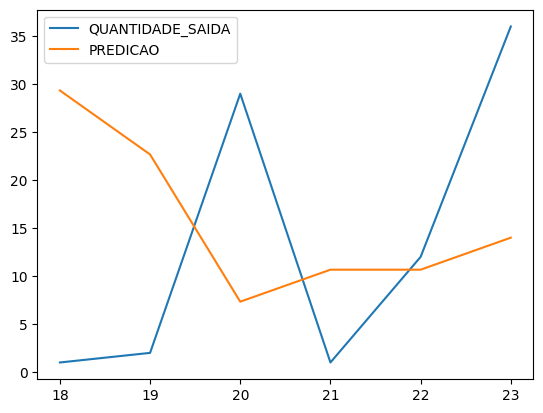

In [72]:
data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 10277002")[["QUANTIDADE_SAIDA","PREDICAO"]][-6:].plot()

<AxesSubplot:>

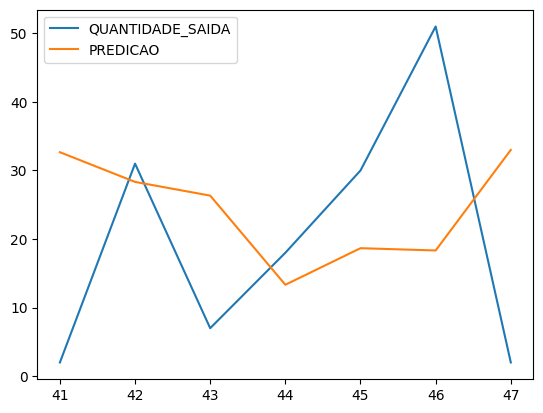

In [74]:
data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020070")[["QUANTIDADE_SAIDA","PREDICAO"]][-7:].plot()

In [76]:
data_predict_media_movel.query("NUMERO_REGISTRO_PRODUTO == 100020070")[["QUANTIDADE_SAIDA","PREDICAO"]][-6:]

,QUANTIDADE_SAIDA,PREDICAO
42,31,28.333333
43,7,26.333333
44,18,13.333333
45,30,18.666667
46,51,18.333333
47,2,33.000000


# Definindo classe previsão de média móvel

In [3]:
data = load_data.conect_data.load_table('../../data/data_ingestion/', 'ingestion.itens_output_mvp', 'csv', sep=None)

../predict_stock_mvp/pre_train\load_data.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(f'{location_table}/{name_table}.{type_table}', encoding=encoding, sep=sep)


In [4]:
data

,NUMERO_REGISTRO_PRODUTO,IDENTIFICADOR_DO_ITEM,NOME_PRODUTO,DATA_DE_CONSUMO,QUANTIDADE_SAIDA
0,10277002,25991014035,BILAGOGO,2020-02-29,21
1,10277002,25991014035,BILAGOGO,2020-03-31,18
2,10277002,25991014035,BILAGOGO,2020-04-30,56
3,10277002,25991014035,BILAGOGO,2020-05-31,0
4,10277002,25991014035,BILAGOGO,2020-06-30,21
...,...,...,...,...,...
47995,996640035,25351208860,PRODUTO DE MEDICAMENTO DE TESTE 02,2021-09-30,81
47996,996640035,25351208860,PRODUTO DE MEDICAMENTO DE TESTE 02,2021-10-31,21
47997,996640035,25351208860,PRODUTO DE MEDICAMENTO DE TESTE 02,2021-11-30,21
47998,996640035,25351208860,PRODUTO DE MEDICAMENTO DE TESTE 02,2021-12-31,0


In [11]:
class metods_predict:
    
    def predict_model ():
        pass
    
    def predict_mean(data=load_data.conect_data.load_table('../../data/data_ingestion/', 'ingestion.itens_output_mvp', 'csv', sep=None)):
        
        data_predict_media_movel = data[["NUMERO_REGISTRO_PRODUTO","DATA_DE_CONSUMO","QUANTIDADE_SAIDA"]]
        
        predict_media = []
        for item in data_predict_media_movel["NUMERO_REGISTRO_PRODUTO"].unique():
            serie_itens = data_predict_media_movel.query(f"NUMERO_REGISTRO_PRODUTO == {item}")
            media_movel = list(serie_itens.QUANTIDADE_SAIDA.shift(1).rolling(3).mean())
            for n in media_movel[:]:
                predict_media.append(n)
                
        data_predict_media_movel["PREDICAO_MEDIA_MOVEL"] = predict_media
        
        load_data.conect_data.save_table(data_predict_media_movel, '../../data/data_processed/', 'processed.predict', 'csv')

../predict_stock_mvp/pre_train\load_data.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(f'{location_table}/{name_table}.{type_table}', encoding=encoding, sep=sep)


In [12]:
metods_predict.predict_mean()

C:\Users\anton\AppData\Local\Temp\ipykernel_4340\977651833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_predict_media_movel["PREDICAO_MEDIA_MOVEL"] = predict_media
